# **Distribución gausiana o normal**


Es la mas importante de las distribuciones continuas, posee  una gran aplicación en modelaje y estadistica

La función densidad de probabilidad normal se define como $F(x;\mu,\sigma)$:

$$ F(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}\ \exp\bigg[-\frac{(x-\mu)^2}{2\sigma^2}\bigg] \quad (1) $$

El factor que multiplica la exponencial es el factor de normalización para que la probabilidad total sea igual a uno. La función de densidad de probabilidad normal requiere de dos parámetros para quedar completamente definida: la media $\mu$ y la desviación estándar $\sigma$ (o la varianza $\sigma^2$) de la distribución.


# **Código para subir archivo y uso de librerias**


In [6]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import matplotlib
import IPython.display as ipd
from scipy.stats import norm
import pandas as pd

# **Código para mostrar los resultados del archivo de ruido**

(44100, array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ 128,  145],
       [1133, 1222],
       [2037, 2102]], dtype=int16))
Frecuencia grabación fs = 44100.0 datos/s
Número de datos = 413696
Duración = 9.4 s
Muestreo temporal = 0.000023 s


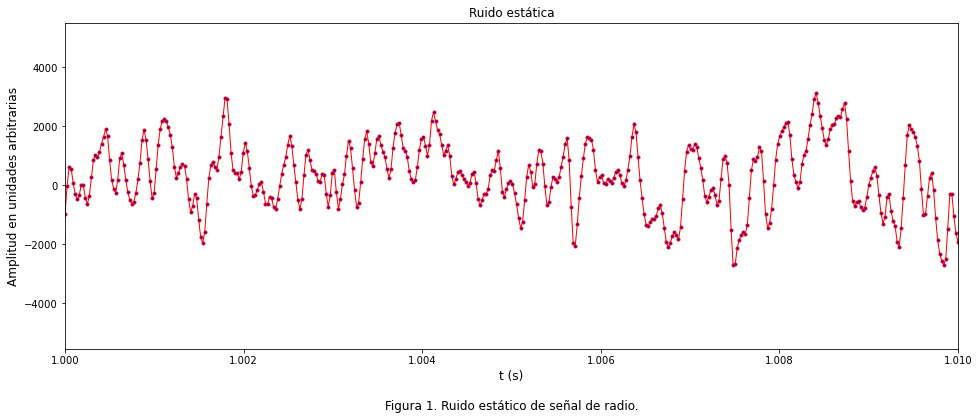

In [14]:
#Datos un canal
fs, data = wavfile.read('Radio FM 101.6.wav')
data = data[:,0]
print(wavfile.read('Radio FM 101.6.wav'))
tamdata = data.size
duration = tamdata/fs
dt = duration/tamdata
t = np.arange(0,duration,dt)

print('Frecuencia grabación fs = %.1f datos/s' % fs)
print('Número de datos = %.f' % tamdata)
print('Duración = %.1f s'  % duration)
print('Muestreo temporal = %f s' % dt)

plt.figure(figsize=(16,6))
plt.plot(t,data,lw=1,color='r',marker='.',ms=6,markerfacecolor='blue')
plt.title('Ruido estática')
plt.ylabel('Amplitud en unidades arbitrarias',fontsize=12)
plt.xlabel('''t (s)

Figura 1. Ruido estático de señal de radio.''',fontsize=12)
plt.xlim(1,1.01)
plt.show()

# **Codigo para diseñar histograma desde los datos anteriores**

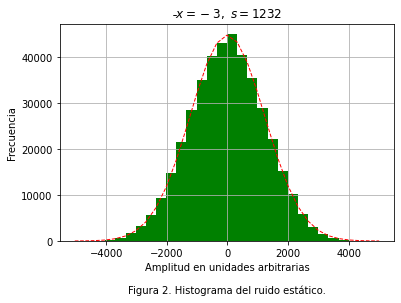

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(data, 30, facecolor='green')

# add a 'best fit' line
mu = np.mean(data)
sigma = np.std(data)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y*tamdata*abs(bins[0]-bins[1]), 'r--', linewidth=1)

plt.xlabel('''Amplitud en unidades arbitrarias

Figura 2. Histograma del ruido estático.''')
plt.ylabel('Frecuencia')
plt.title(r'$ \bar x=%.f,\ s=%.f$'%(mu,sigma))
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

# **Código función densidad de probabilidad**

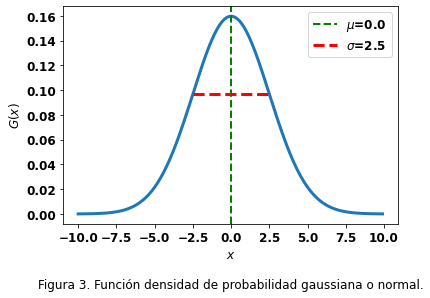

In [ ]:

mu = 0 # media aritmética
sigma = 2.5 # desviación estándar

x = np.arange(-10,10,0.1)
G = (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

font = {'weight' : 'bold', 'size'   : 12} 
matplotlib.rc('font', **font)

plt.figure(4)
plt.plot(x,G,linewidth=3)
plt.ylabel('$G(x)$')
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)), 
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3, 
         linestyle="--", color="red", solid_capstyle="butt", label='$\sigma$=%.1f'%sigma)
plt.legend()
plt.xlabel('''$x$

Figura 3. Función densidad de probabilidad gaussiana o normal.''')
plt.show()

# **Cálculo de probabilidades**

Como $F(x;\mu,\sigma)$ es una función de densidad de probabilidad podemos calcular probabilidades. Por ejemplo calculemos la probabilidad de obtener un dato entre $x_1$ y $x_2$, con $x_1 < x_2$.

$$ P(x_1 < x < x_2) = \int\limits_{x_1}^{x_2} F(x;\mu,\sigma) \ dx = \frac{1}{\sigma \sqrt{2\pi}}\int\limits_{x_1}^{x_2}  \exp\bigg[-\frac{(x-\mu)^2}{2\sigma^2}\bigg] \ dx \quad (2)$$

Un caso particular de mayor interés para nosotros es la probabilidad de obtener un dato en el intervalo definido por la desviación estándar $\sigma$:

$$ P(\bar x - \sigma < x < \bar x + \sigma) = \int\limits_{\bar x-\sigma}^{\bar x+\sigma} G(x;\mu,\sigma) \ dx = 0.68  \quad (2)$$

**Límite de confianza**: el valor 0.68, que corresponde aproximadamente a dos tercios, lo podemos interpretar de la siguiente manera: con un nivel del 68% de confianza podemos asegurar que al medir un nuevo dato el valor de este se encontrará a no más de una desviación estándar de la media. También podemos decir que de tres medidas que hagamos solo una estará a más de una desviación estándar de la media ($0.32 \approx 1/3$).

En la siguiente tabla se presentan los porcentajes para múltiplos de la desviación estándar.

centrado en la media | $\sigma$ | $2\sigma$ | $3\sigma$
- | - | - | -
 Dentro del rango | 68% | 95% | 99.7%
 Fuera del rango | 32% | 5% | 0.3%
  | 1 en 3 | 1 en 20 | 1 en 400

## **Ejemplo**
Usemos nuevamente los datos del ruido estático del radio, para ver si las predicciones del límite de confianza se cumplen.Usemos la mitad de los datos para determinar la media y la desviación estándar, y luego tomemos grupos de a 9 datos para ver si se cumple la predicción de que 3 de cada 9 datos están a menos de una desviación estándar de la media.
Usemos nuevamente los datos del ruido estático del radio, para ver si las predicciones del límite de confianza se cumplen.Usemos la mitad de los datos para determinar la media y la desviación estándar, y luego tomemos grupos de a 9 datos para ver si se cumple la predicción de que 3 de cada 9 datos están a menos de una desviación estándar de la media.

Media de la muestra = -3
Desviación estándar de la muestra = 1232


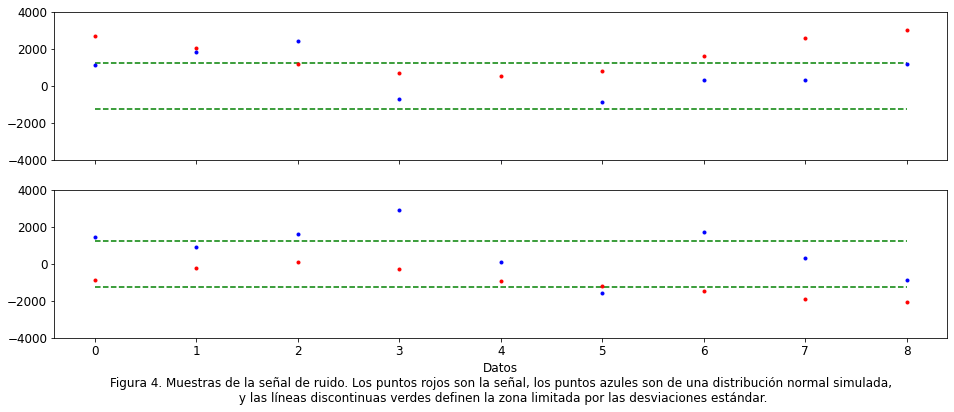

In [ ]:
#@title *Código: ejemplo*

dataBase = data[0:int(len(data/2))]
prueba1 = data[int(len(data)/2):int(len(data)/2 + 9)]
prueba2 = data[int(len(data)/2 + 9):int(len(data)/2 + 18)]
prueba3 = data[int(len(data)/2 + 81):int(len(data)/2 + 90)]

muBase = np.mean(dataBase)
sigmaBase = np.std(dataBase)
print('Media de la muestra = %.f'%muBase)
print('Desviación estándar de la muestra = %.f'%sigmaBase)

aleatorio = np.random.normal(loc=muBase,scale=sigmaBase,size=18)

font = {'weight' : 'normal', 'size'   : 12} 
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,figsize=(16,6))
axs[0].plot(prueba1,'r.',aleatorio[0:9],'b.')
axs[1].plot(prueba3,'r.',aleatorio[9:18],'b.')
axs[1].set_xlabel('''Datos
Figura 4. Muestras de la señal de ruido. Los puntos rojos son la señal, los puntos \
azules son de una distribución normal simulada,
 y las líneas discontinuas verdes definen \
la zona limitada por las desviaciones estándar.''')

for ax in axs:
    ax.label_outer()
    ax.set_ylim(-4000,4000)
    ax.hlines(sigmaBase + muBase,0,8,linestyles='--',colors='g')
    ax.hlines(-sigmaBase + muBase,0,8,linestyles='--',colors='g')